In [1]:
# Prepare CSV data, but using the dedicated method embedded in pandas Python package

import pandas as pd

df = pd.read_csv("https://bit.ly/perch_csv_data")
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [3]:
# Prepare the target data

import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
                        115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                        150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
                        218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
                        556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
                        850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
                        1000.0])

In [5]:
# Divide perch_full and perch_weight into a training set and a test set

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

In [8]:
# Now we use teh transformer that provides various classes to make features or to preprocess the given data

# fit() method finds the new feature combinations that will be created newly
# transform() method actually creates the converted data
# Each process should be conducted synchroniously, fit() -> method().

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


`PolynomialFeatures` class creates terms that square each separate feature, and adds new terms that has been multiplied by features.

In [7]:
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [9]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [11]:
# According to the previous code block, we could know that there are 9 features now
# after the transformation process.

# To look for check which features were created, use the following method

poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [13]:
# Transform the test set like the training set is recommended.

test_poly = poly.transform(test_input)

In [15]:
# Apply the polynomial features to the regression algorithm,
# then evaluate the performance in the training session.

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [17]:
print(lr.score(test_poly, test_target))

# It seems that the accuracy has been enhanced significantly
# and the vestige of underfitting was gone away clearly.

0.9714559911594111


In [19]:
# What if we manually add more features, including cubic, quadratic or higher terms
# by modifying degree parameter in PolynomialFeatures?

poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly  = poly.transform(test_input)

print(train_poly.shape)

# Now we can check the quantity of features has been grown a lot, 55.

(42, 55)


In [20]:
# Evaluate the training set performance

lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999996433


In [23]:
# Evaluate the test set performance

print(lr.score(test_poly, test_target))

# Excessively overfitted, isn't it?

-144.40579436844948


In [25]:
# Regularization is to hinder not to model learn the training set too much
# → Not to make the model overfitted

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()   # To make the coefficients equivalent each other, use dedicated
                        # method that automatically calculates the mean and the standards.
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled  = ss.transform(test_poly)

In [27]:
# Use ridge regression method to apply restriction to the model

from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [29]:
# Evalulate the real performance

print(ridge.score(test_scaled, test_target))

# The R^2 score has been returned normally (actually, improved a little bit more.)

0.9790693977615387


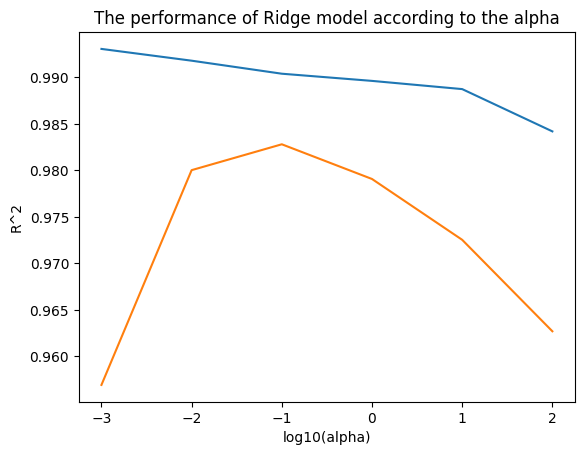

In [44]:
# alpha value is a hyperparameter that determine the intensity of regulation to the model.
# The more alpha value increases, it intenses the degree of regulation and tends to be underfitted more.
# The less alpha value decreases, it loosen the degree of regulation and tends to be overfitted more.

# The one of the most representative way to find the optimal R^2 value is
# drawing the graph of it according to the transitioning alpha value.

import matplotlib.pyplot as plt

train_score = []
test_score  = []
alpha_list  = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_scaled,train_target)    # fit

  train_score.append(ridge.score(train_scaled, train_target)) # Evalulate
  test_score.append(ridge.score(test_scaled, test_target))

# Draw a scatter plot

plt.plot(np.log10(alpha_list), train_score)   # logarithm for equalize the gap between alphas
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel("log10(alpha)")
plt.ylabel("R^2")
plt.title("The performance of Ridge model according to the alpha")

plt.show()

In [38]:
# We find it's the most optimized to use the log value of alpha -1 (-> 0.1)
# train again and see the performance.

ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

# The R^2 value has been increased to 0.982. Very satisfying.

0.9903815817570367
0.9827976465386928


In [52]:
# Lasso regulation
# Very similar to use Ridge

from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [53]:
# Evaluate the real performance

print(lasso.score(test_scaled, test_target))

# Pretty nice.

0.9800593698421883


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


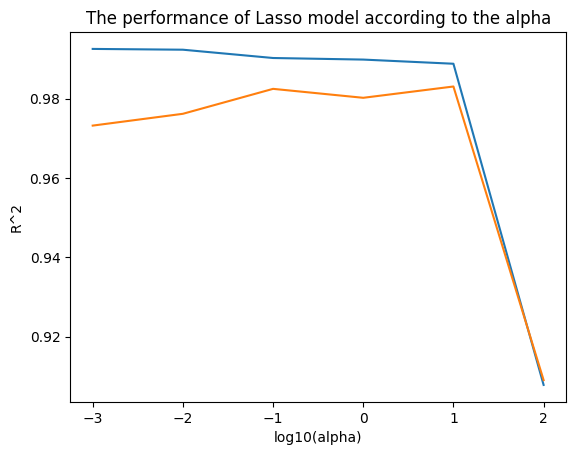

In [54]:
# Find the most optimized alpha value, like the previous Ridge.

train_score = []
test_score  = []
alpha_list  = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  lasso = Lasso(alpha = alpha, max_iter = 10000)
  lasso.fit(train_scaled, train_target)             # fit

  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel("log10(alpha)")
plt.ylabel("R^2")
plt.title("The performance of Lasso model according to the alpha")

plt.show()

In [56]:
# It seems that alpha = 10(log(10) = 1) is the most appropriate for Lasso.

lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)

# Evaluate 
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

# We can rate the model has been properly fitted.

0.9888067471131867
0.9824470598706695


In [59]:
# How many features has converted by Lasso?

print(lasso.coef_)

print("\n\n")
print(np.sum(lasso.coef_ == 0))

[ 0.          0.          0.         12.14852453 55.44856399 42.23100799
  0.          0.         13.70596191  0.         43.2185952   5.7033775
 47.46254536  7.42309425 11.85823365  0.          0.         13.53038193
 21.22111356  0.          0.          0.          0.          0.
  0.         18.66993032  0.          0.          0.         15.81041778
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         18.14672268  0.          0.          0.
  0.         15.51272953  0.          0.          0.          0.
  0.        ]



40
